# Movies - Regressor

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_parquet("../data/movies-clean.parquet.gzip")
df.head()

,RATING,VOTES,RunTime,TYPE,Year_From,Year_To,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,...,Director_Àlex Pastor,Director_Álex de la Iglesia,Director_Álvaro Brechner,Director_Álvaro Fernández Armero,Director_Álvaro Longoria,Director_Ángel Gómez Hernández,Director_Ángeles Reiné,Director_Åke Sandgren,Director_Óscar Pedraza,Director_Ömer Ugur
0,6.1,21062,121.0,Movie,2021,2021,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,17870,25.0,Series,2021,2021,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,8.2,885805,44.0,Series,2010,2022,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,414849,23.0,Series,2013,2013,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,7.6,25858,50.0,Series,2020,2020,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## One-Hot Encoding

In [6]:
df["TYPE"] = np.where(df["TYPE"] == "Movie", 1, 0)
df.head()

,RATING,VOTES,RunTime,TYPE,Year_From,Year_To,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,...,Director_Àlex Pastor,Director_Álex de la Iglesia,Director_Álvaro Brechner,Director_Álvaro Fernández Armero,Director_Álvaro Longoria,Director_Ángel Gómez Hernández,Director_Ángeles Reiné,Director_Åke Sandgren,Director_Óscar Pedraza,Director_Ömer Ugur
0,6.1,21062,121.0,1,2021,2021,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,17870,25.0,0,2021,2021,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,8.2,885805,44.0,0,2010,2022,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,414849,23.0,0,2013,2013,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,7.6,25858,50.0,0,2020,2020,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Scaling

In [7]:
columns_to_scale = ["VOTES", "RunTime", "Year_From", "Year_To"]

scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


## Train/Test Split

In [8]:
X = df.drop(columns=['RATING'])
y = df["RATING"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Train Shape: {X_train.shape}")
print(f"Test Shape: {X_test.shape}")

Train Shape: (6534, 21440)
Test Shape: (1634, 21440)


## Training

In [11]:
model = MLPRegressor(random_state=1,
                     max_iter=500,
                     # hidden_layer_sizes=(100, 50, 30),
                     n_iter_no_change=10,
                     early_stopping=True,
                     validation_fraction=0.1,
                     verbose=True)
model.fit(X_train, y_train)

Iteration 1, loss = 20.13346011
Validation score: -20.575718
Iteration 2, loss = 11.44308825
Validation score: -9.612764
Iteration 3, loss = 4.17331560
Validation score: -3.049469
Iteration 4, loss = 1.50041526
Validation score: -1.413699
Iteration 5, loss = 0.99209126
Validation score: -1.064187
Iteration 6, loss = 0.72526320
Validation score: -0.864602
Iteration 7, loss = 0.54413355
Validation score: -0.703720
Iteration 8, loss = 0.41649925
Validation score: -0.586251
Iteration 9, loss = 0.32363828
Validation score: -0.501920
Iteration 10, loss = 0.25630628
Validation score: -0.434686
Iteration 11, loss = 0.20685728
Validation score: -0.390557
Iteration 12, loss = 0.17015632
Validation score: -0.347932
Iteration 13, loss = 0.14296505
Validation score: -0.317758
Iteration 14, loss = 0.12231006
Validation score: -0.293934
Iteration 15, loss = 0.10636992
Validation score: -0.272985
Iteration 16, loss = 0.09412741
Validation score: -0.257572
Iteration 17, loss = 0.08455229
Validation sco

C:\ProgramData\Miniconda3\envs\ds-lasalle\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(early_stopping=True, max_iter=500, random_state=1, verbose=True)

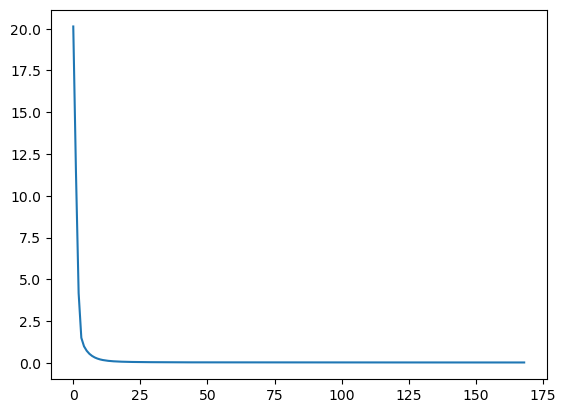

In [13]:
loss_curve = model.loss_curve_
plt.plot(loss_curve)
plt.show()

## Evaluation

### Train

In [14]:
y_pred = model.predict(X_train)

mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred, squared=True)
rmse = mean_squared_error(y_train, y_pred, squared=False)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")

MAE: 0.189251119583713
RMSE: 0.42229841656604084
MSE: 0.17833595263418536


### Test

In [15]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")

MAE: 0.901402302588108
RMSE: 1.265754410053988
MSE: 1.602134226571119
